In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('train_ctrUa4K.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df['Loan_Status']=np.where(df['Loan_Status']=='Y',1,0)

In [9]:
df['Loan_Status']=df['Loan_Status'].astype(int)

In [10]:
for i in df.columns:
    print('---START---')
    print('Column name:' , i)
    print(df[i].value_counts())
    if df[i].isnull().sum() > 0:
        print('Nulls present for: ', df[i].isnull().sum())
    else:
        print('Nulls NOT present')
    print('---END---')

---START---
Column name: Loan_ID
LP001778    1
LP001106    1
LP001398    1
LP001504    1
LP001656    1
           ..
LP001047    1
LP002342    1
LP002501    1
LP001041    1
LP001744    1
Name: Loan_ID, Length: 614, dtype: int64
Nulls NOT present
---END---
---START---
Column name: Gender
Male      489
Female    112
Name: Gender, dtype: int64
Nulls present for:  13
---END---
---START---
Column name: Married
Yes    398
No     213
Name: Married, dtype: int64
Nulls present for:  3
---END---
---START---
Column name: Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Nulls present for:  15
---END---
---START---
Column name: Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Nulls NOT present
---END---
---START---
Column name: Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Nulls present for:  32
---END---
---START---
Column name: ApplicantIncome
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818   

In [11]:
df.drop(['Loan_ID'],1,inplace=True)

df['Gender']=df['Gender'].fillna('Other')

df['Married']=df['Married'].fillna('NA')

df['Dependents']=df['Dependents'].fillna('NA')

df['Self_Employed']=df['Self_Employed'].fillna('NA')

In [12]:
df['Credit_History']=df['Credit_History'].fillna('NA')
df['Credit_History']=np.where(df['Credit_History']==1.0,'Yes','No')

In [13]:
cat_cols=df.select_dtypes(include=['object']).columns
cat_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'],
      dtype='object')

In [14]:
#converting all to dummies and deleting the original column
for col in cat_cols:
    dummy=pd.get_dummies(df[col],prefix=col,drop_first=True)
    df=pd.concat([df,dummy],axis=1)
    print(col)
    del df[col]
del dummy

Gender
Married
Dependents
Education
Self_Employed
Credit_History
Property_Area


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               592 non-null    float64
 3   Loan_Amount_Term         600 non-null    float64
 4   Loan_Status              614 non-null    int32  
 5   Gender_Male              614 non-null    uint8  
 6   Gender_Other             614 non-null    uint8  
 7   Married_No               614 non-null    uint8  
 8   Married_Yes              614 non-null    uint8  
 9   Dependents_1             614 non-null    uint8  
 10  Dependents_2             614 non-null    uint8  
 11  Dependents_3+            614 non-null    uint8  
 12  Dependents_NA            614 non-null    uint8  
 13  Education_Not Graduate   614 non-null    uint8  
 14  Self_Employed_No         6

In [16]:
df['ApplicantIncome']

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <a list of 10 Patch objects>)

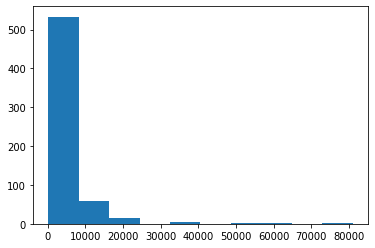

In [17]:
plt.hist(df['ApplicantIncome'])

In [18]:
df['LoanAmount'].isnull().sum()

22

(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <a list of 10 Patch objects>)

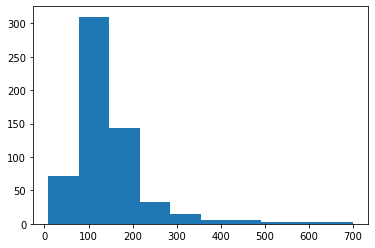

In [19]:
plt.hist(df['LoanAmount'])

In [20]:
df['LoanAmount'].median()

128.0

In [21]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

(array([ 72., 332., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <a list of 10 Patch objects>)

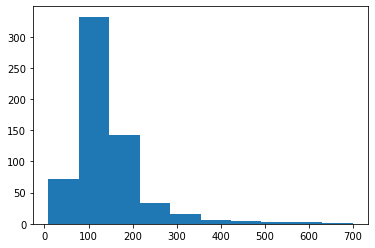

In [22]:
plt.hist(df['LoanAmount'])

In [42]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [43]:
con_cols = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

In [44]:
for i in con_cols:
    df[i]=df[i].astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ApplicantIncome          614 non-null    int32
 1   CoapplicantIncome        614 non-null    int32
 2   LoanAmount               614 non-null    int32
 3   Loan_Amount_Term         614 non-null    int32
 4   Loan_Status              614 non-null    int32
 5   Gender_Male              614 non-null    uint8
 6   Gender_Other             614 non-null    uint8
 7   Married_No               614 non-null    uint8
 8   Married_Yes              614 non-null    uint8
 9   Dependents_1             614 non-null    uint8
 10  Dependents_2             614 non-null    uint8
 11  Dependents_3+            614 non-null    uint8
 12  Dependents_NA            614 non-null    uint8
 13  Education_Not Graduate   614 non-null    uint8
 14  Self_Employed_No         614 non-null    uint8
 15  Self_E

In [46]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [47]:
y=df['Loan_Status']
x=df.drop(['Loan_Status'],axis=1)

In [55]:
def find_best_model(X,y):
    models = {
    
        'Logr': {
            'model': LogisticRegression(),
            'parameters': {
                'C':[0.01,0.1,1,10,100]
            }
        },
        
        
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'parameters': {
                'criterion': ['gini','entropy'],
                'splitter': ['best', 'random']
            }
        },
        
        
        'KNN': {
            'model': KNeighborsClassifier(),
            'parameters': {
                'n_neighbors': [3,5,10,15]            }
        },
        
        'RandomForest': {
            'model': RandomForestClassifier(),
            'parameters': {
                'n_estimators': [10,20,50,100,200],
                'max_features' : ['auto', 'sqrt'],
                'min_samples_split' : [2, 5, 10],
                'bootstrap' : [True, False]
            }
        }
        
    }
    
    scores = []
    cv_X_y = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_X_y, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'accuracy': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'accuracy'])

find_best_model(x, y)

,model,best_parameters,accuracy
0,Logr,{'C': 100},0.765854
1,decision_tree,"{'criterion': 'gini', 'splitter': 'random'}",0.671545
2,KNN,{'n_neighbors': 15},0.647154
3,RandomForest,"{'bootstrap': True, 'max_features': 'sqrt', 'm...",0.752846


In [56]:
#Logr gives best performance 

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
model = LogisticRegression(C=100)
model.fit(x_train, y_train)

LogisticRegression(C=100)

In [59]:
model.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
model.score(x_test, y_test)

0.7642276422764228